<a href="https://colab.research.google.com/github/HenriqueHideaki/RepositorioInteligenciaArtificial/blob/main/QUEST%C3%83O_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

#A rede bayesiana abaixo concerne ao problema de partida de um carro, de uma forma bem simplificada (Extraído do Livro Bayesian Reasoning and Machine Learning - D. Barber)

##Um agente inteligente com base nas inferências, isto é, o cálculo da P(f=empty|s=no) (a probabilidade do tanque estar vazio dado que o carro não deu partida) e da P(b=bad|s=no) (a probabilidade da bateria estar descarregada e o carro não deu partida), deve decidir qual o problema mais provável pela não partida do carro. Apresente a solução e implemente os cálculos de forma computacional

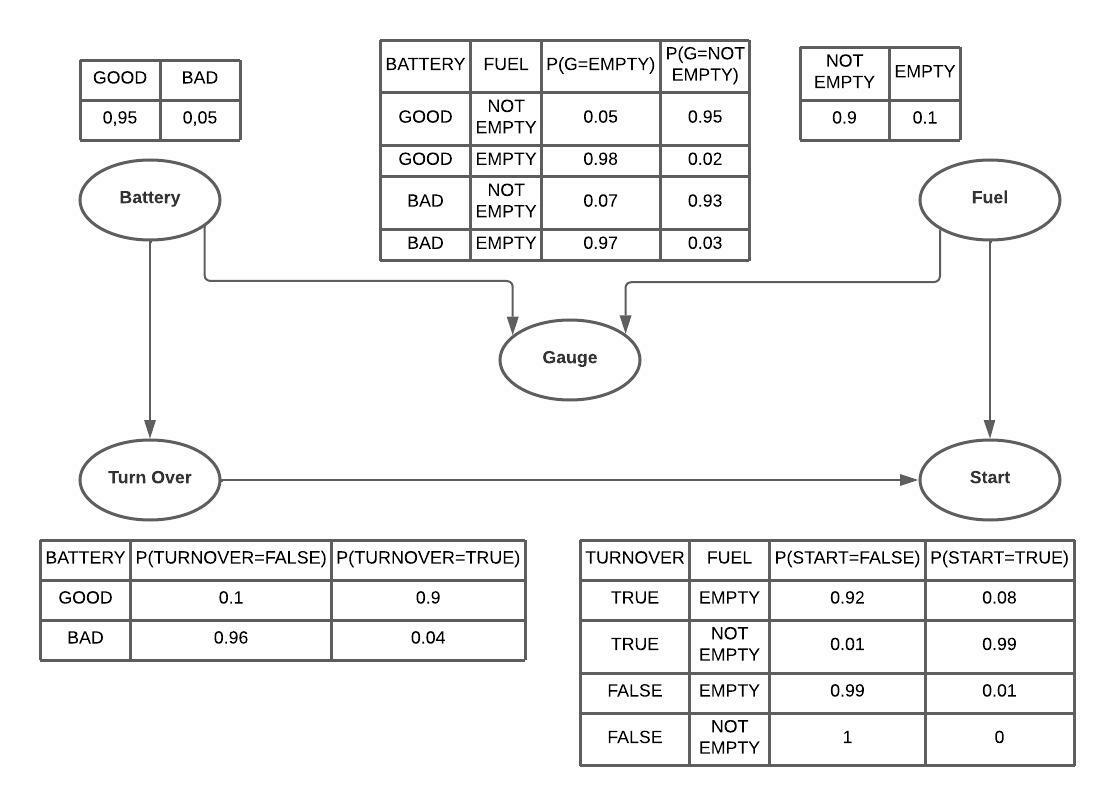

In [ ]:
Image('/content/DIAGRAMA.jpeg')

In [ ]:
!pip install pgmpy

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Definindo a estrutura do modelo
model = BayesianModel([('B', 'G'), ('B', 'T'), ('T', 'S'), ('F', 'G'), ('F','S') ])

cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.95], [0.05]], state_names = { 'B': ['GOOD', 'BAD'] })
cpd_f = TabularCPD(variable='F', variable_card=2, values=[[0.1], [0.9]], state_names = { 'F': ['EMPTY', 'NOT EMPTY'] })
cpd_g = TabularCPD(variable='G', variable_card=2, values = [[0.98,0.05,0.97,0.07],
                                                            [0.02,0.95,0.03,0.93]],
                   evidence=['B', 'F'],
                   evidence_card=[2, 2], 
                   state_names = { 'G': ['EMPTY', 'NOT EMPTY'], 'B': ['GOOD', 'BAD'], 'F': ['EMPTY', 'NOT EMPTY']}
)
cpd_t = TabularCPD(variable='T', variable_card=2, values = [[0.1,0.96],
                                                            [0.9,0.04]],
                   evidence=['B'],
                   evidence_card=[2], 
                   state_names = { 'T': ['FALSE', 'TRUE'], 'B': ['GOOD', 'BAD']}
)
cpd_s = TabularCPD(variable='S', variable_card=2, values = [[0.99,1,0.92,0.01],
                                                            [0.01,0,0.08,0.99]],
                   evidence=['T', 'F'],
                   evidence_card=[2,2], 
                   state_names = { 'S': ['FALSE', 'TRUE'], 'T': ['FALSE', 'TRUE'], 'F': ['EMPTY', 'NOT EMPTY']}
)


model.add_cpds(cpd_b,cpd_f,cpd_g,cpd_t,cpd_s)
model.check_model()

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


True

In [ ]:
# Agora podemos chamar alguns métodos no objeto BayesianModel.
model.get_cpds()

[<TabularCPD representing P(B:2) at 0x7fe3b27ba390>,
 <TabularCPD representing P(F:2) at 0x7fe3b27ba190>,
 <TabularCPD representing P(G:2 | B:2, F:2) at 0x7fe3b27ba350>,
 <TabularCPD representing P(T:2 | B:2) at 0x7fe3b27ba990>,
 <TabularCPD representing P(S:2 | T:2, F:2) at 0x7fe3b27ba910>]

In [ ]:
print('Battery')
print(cpd_b)
print('\nFuel')
print(cpd_f)
print('\nGauge')
print(cpd_g)
print('\nTurn Over')
print(cpd_t)
print('\nStart')
print(cpd_s)

Battery
+---------+------+
| B(GOOD) | 0.95 |
+---------+------+
| B(BAD)  | 0.05 |
+---------+------+

Fuel
+--------------+-----+
| F(EMPTY)     | 0.1 |
+--------------+-----+
| F(NOT EMPTY) | 0.9 |
+--------------+-----+

Gauge
+--------------+----------+--------------+----------+--------------+
| B            | B(GOOD)  | B(GOOD)      | B(BAD)   | B(BAD)       |
+--------------+----------+--------------+----------+--------------+
| F            | F(EMPTY) | F(NOT EMPTY) | F(EMPTY) | F(NOT EMPTY) |
+--------------+----------+--------------+----------+--------------+
| G(EMPTY)     | 0.98     | 0.05         | 0.97     | 0.07         |
+--------------+----------+--------------+----------+--------------+
| G(NOT EMPTY) | 0.02     | 0.95         | 0.03     | 0.93         |
+--------------+----------+--------------+----------+--------------+

Turn Over
+----------+---------+--------+
| B        | B(GOOD) | B(BAD) |
+----------+---------+--------+
| T(FALSE) | 0.1     | 0.96   |
+--------

#o cálculo da P(f=empty|s=no) (a probabilidade do tanque estar vazio dado que o carro não deu partida) e da P(b=bad|s=no) (a probabilidade da bateria estar descarregada e o carro não deu partida), deve decidir qual o problema mais provável pela não partida do carro.

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

t_dist = infer.query(['T'])
b_dist = infer.query(['S'])
s_dist = infer.query(['B'])


print(infer.query(['F'], evidence={'S': 'FALSE'}))
print(infer.query(['B'], evidence={'S': 'FALSE'}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------+----------+
| F            |   phi(F) |
+==============+==========+
| F(EMPTY)     |   0.4054 |
+--------------+----------+
| F(NOT EMPTY) |   0.5946 |
+--------------+----------+


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+---------+----------+
| B       |   phi(B) |
+=========+==========+
| B(GOOD) |   0.7901 |
+---------+----------+
| B(BAD)  |   0.2099 |
+---------+----------+


# A probabilidade do tanque estar vazio dado que o carro não deu partida é 40,54% enquanto que a probabilidade da bateria estar descarregada dado que o carro também não deu a partida é de 20,99%, podemos inferir então que é mais provavel que o motivo do carro não ter dado a partida é que o tanque esteja vazio.